In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import sklearn
print(sklearn.__version__)

1.0.2


In [14]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [15]:
cc_dic = df['power'].value_counts().to_dict()
# print(cc_dic)
cc_list = [int(cc) for cc in cc_dic.keys()]
cc_list

[150,
 100,
 220,
 350,
 125,
 200,
 160,
 180,
 390,
 250,
 400,
 750,
 110,
 500,
 135,
 223,
 650,
 410,
 300,
 310,
 883,
 535,
 1000,
 1200,
 800,
 600,
 295,
 320,
 1300,
 900,
 302,
 765,
 797,
 675,
 959,
 865,
 149,
 1130,
 502,
 899,
 850,
 1050,
 1262,
 796,
 1090,
 1198,
 175,
 1700,
 1100,
 1800,
 1299,
 821,
 107]

In [16]:
cols = df.columns
cols

cat_cols = []
num_cols = []
for col in cols:
    if df[col].dtype == "object":
        cat_cols.append(col)
    else:
        num_cols.append(col)
print("Categorical columns:- ",cat_cols)
print("Numerical columns:- ",num_cols)

Categorical columns:-  ['bike_name', 'city', 'owner', 'brand']
Numerical columns:-  ['price', 'kms_driven', 'age', 'power']


In [17]:
df.shape

(32648, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [19]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [20]:
df[cat_cols].nunique()

bike_name    471
city         443
owner          4
brand         23
dtype: int64

In [21]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [22]:
df[df['price'] > 250000].shape[0]

969

Observation:- Out of 32000 bikes 969 bikes price over 2.5lacs

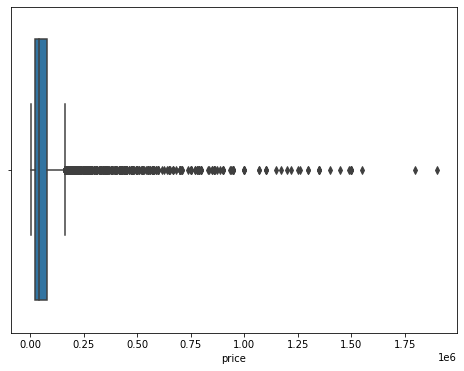

In [10]:
plt.figure(figsize = (8,6))
sns.boxplot(data=df[['price']],x='price')
# plt.ylim(round(df.price.min(),0), round(df.price.max(),0))
plt.show()

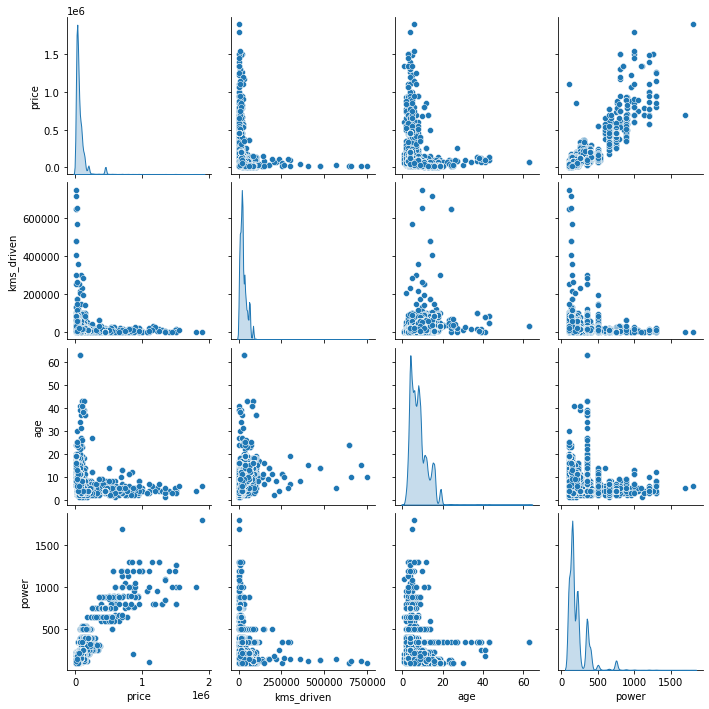

In [11]:
sns.pairplot(df,diag_kind="kde")

## Owner

<AxesSubplot:xlabel='owner', ylabel='price'>

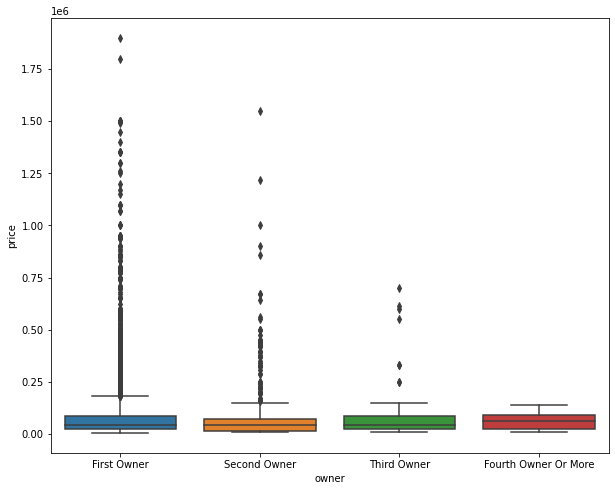

In [12]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df[['price','owner']],x='owner',y='price')

In [23]:
pd.options.display.float_format = '{:.1f}'.format
group_by_owner = df.groupby('owner')
group_by_owner.agg(np.mean)

,price,kms_driven,age,power
owner,,,,
First Owner,69512.4,26474.5,7.7,211.8
Fourth Owner Or More,61332.5,29173.3,15.2,264.2
Second Owner,53552.3,24465.4,12.1,231.3
Third Owner,81431.9,34606.1,11.2,259.1


In [24]:
group_by_owner.agg(min)

,bike_name,price,city,kms_driven,age,power,brand
owner,,,,,,,
First Owner,BMW F750 GS 850cc,4400.0,24 Pargana,3.0,1.0,100.0,BMW
Fourth Owner Or More,Bajaj Avenger 220cc,11000.0,Ahmedabad,2009.0,4.0,100.0,Bajaj
Second Owner,Bajaj Pulsar 180cc,7500.0,24 Pargana,1.0,2.0,100.0,Bajaj
Third Owner,Bajaj Avenger 200cc,7000.0,Ahmedabad,23.0,4.0,100.0,Bajaj


In [25]:
group_by_owner[['price','age', 'power']].max()

,price,age,power
owner,,,
First Owner,1900000.0,43.0,1800.0
Fourth Owner Or More,141000.0,37.0,350.0
Second Owner,1550000.0,63.0,1200.0
Third Owner,699000.0,43.0,800.0


(4400.0, 1900000.0)

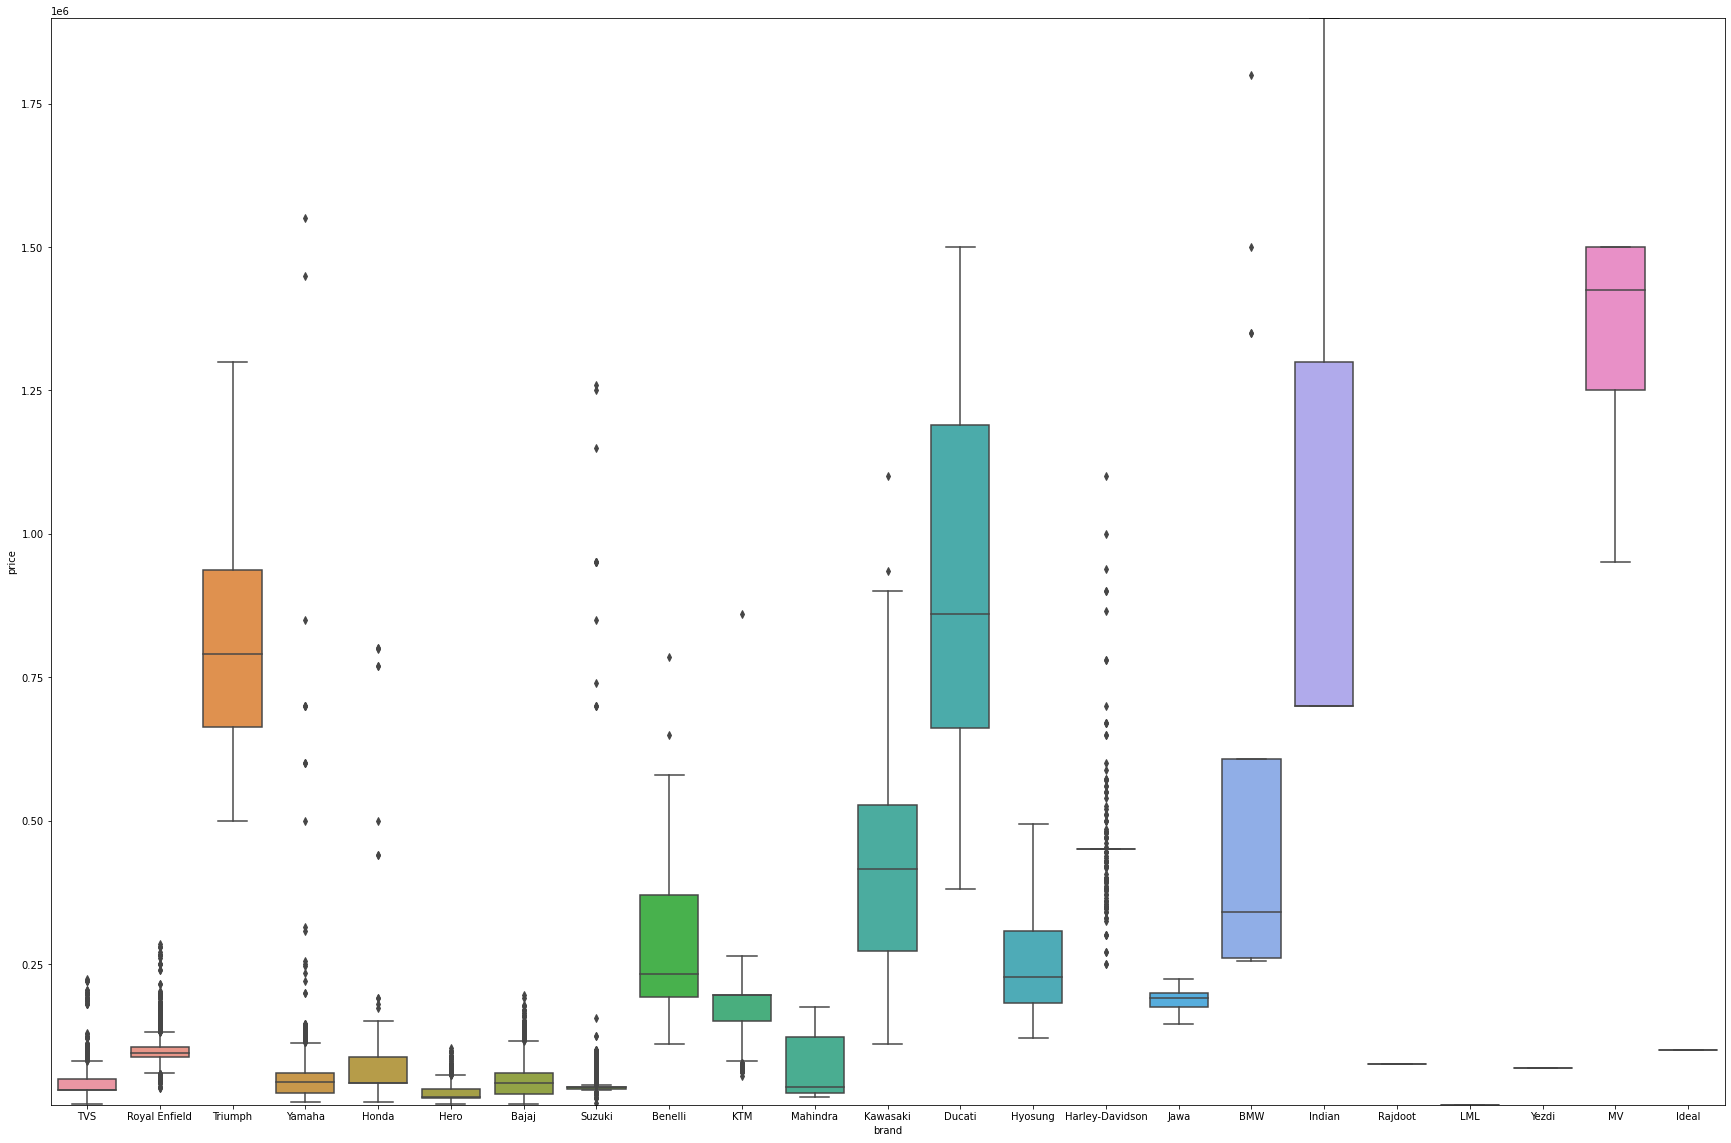

In [16]:
plt.figure(figsize = (30,20))
sns.boxplot(data=df[['price','brand']],x='brand',y='price')
plt.ylim(round(df.price.min(),0), round(df.price.max(),0))

#### How many brands are in dataset?

In [26]:
df['brand'].nunique()

23

#### How many bikes each brand consists?

In [27]:
BB_ratio = df['brand'].value_counts().to_dict()
BB_ratio

{'Bajaj': 11213,
 'Hero': 6368,
 'Royal Enfield': 4178,
 'Yamaha': 3916,
 'Honda': 2108,
 'Suzuki': 1464,
 'TVS': 1247,
 'KTM': 1077,
 'Harley-Davidson': 737,
 'Kawasaki': 79,
 'Hyosung': 64,
 'Benelli': 56,
 'Mahindra': 55,
 'Triumph': 26,
 'Ducati': 22,
 'BMW': 16,
 'Jawa': 10,
 'MV': 4,
 'Indian': 3,
 'Ideal': 2,
 'Rajdoot': 1,
 'LML': 1,
 'Yezdi': 1}

#### Min Max Avg price of every brand?

In [28]:
brand = []
mini = []
maxi = []
avg = []
for b in BB_ratio.keys():
    brand.append(b)
    mini.append(df[df['brand'] == b].price.min())
    maxi.append(df[df['brand'] == b].price.max())
    avg.append(round(df[df['brand'] == b].price.mean(),2))

brands_df = pd.DataFrame(list(zip(brand,mini,maxi,avg)), columns = ['Brand', 'Minimum_price', 'Maximum_price', 'Average_price'])
brands_df

,Brand,Minimum_price,Maximum_price,Average_price
0,Bajaj,6400.0,195000.0,48331.3
1,Hero,5000.0,104000.0,23829.5
2,Royal Enfield,33500.0,285000.0,98562.1
3,Yamaha,9400.0,1550000.0,57069.0
4,Honda,10000.0,800000.0,59230.5
5,Suzuki,8000.0,1260000.0,45946.8
6,TVS,5800.0,224000.0,44299.2
7,KTM,55000.0,860000.0,174669.6
8,Harley-Davidson,250000.0,1100000.0,452998.8
9,Kawasaki,110000.0,1100000.0,411624.6


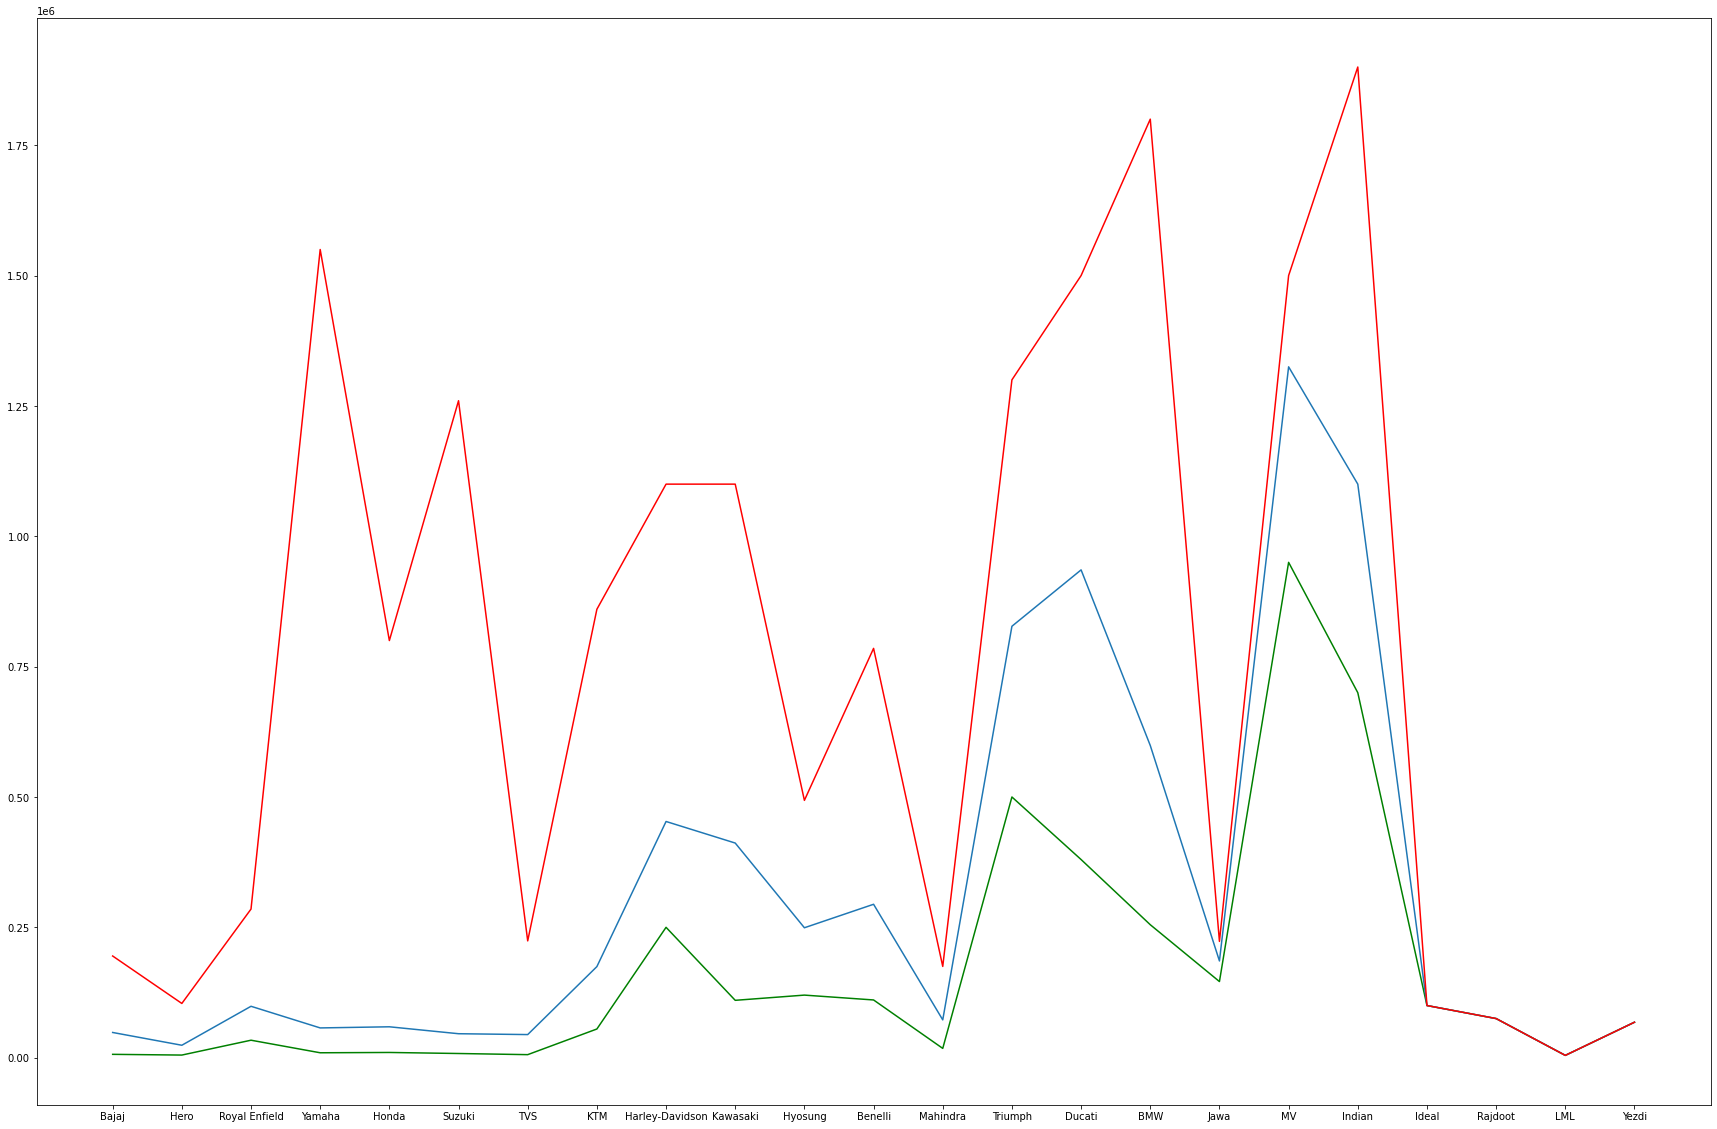

In [45]:
plt.figure(figsize = (30,20))
plt.plot(brands_df.Brand, brands_df.Minimum_price, color='g')
plt.plot(brands_df.Brand, brands_df.Average_price)
plt.plot(brands_df.Brand, brands_df.Maximum_price, color='r')


In [29]:
group_by_brand = df.groupby('brand')
group_by_brand[['bike_name','owner','city']].max()

,bike_name,owner,city
brand,,,
BMW,BMW S 1000 XR Pro,First Owner,Pune
Bajaj,Bajaj XCD 135,Third Owner,Yamuna Nagar
Benelli,Benelli TRK 502X,Second Owner,Pune
Ducati,Ducati XDiavel 1262CC S,Second Owner,Pune
Harley-Davidson,Harley-Davidson XG750 750cc,Third Owner,Tiruvallur
Hero,Hero i Smart 125cc,Third Owner,Wardha
Honda,Honda X-Blade 160cc,Third Owner,Visakhapatnam
Hyosung,Hyosung GT650R,Third Owner,Thane
Ideal,Ideal Jawa Yezdi CL-II 250 cc,Second Owner,Thiruvananthapuram


In [30]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [31]:
df['age'].value_counts(sort='asc')

4.0     5048
8.0     3806
6.0     3573
5.0     3390
9.0     3072
7.0     2791
3.0     1590
11.0    1572
12.0    1463
15.0    1321
16.0    1297
10.0    1083
13.0     782
14.0     739
19.0     614
2.0      385
17.0      41
18.0      25
1.0       10
24.0       8
20.0       7
43.0       4
37.0       3
39.0       3
27.0       3
41.0       3
23.0       3
25.0       3
38.0       2
63.0       2
30.0       1
34.0       1
31.0       1
22.0       1
26.0       1
Name: age, dtype: int64

#### Most of the bikes are 3-9 years old

#### Does older(>20years) bikes cost more than new bikes(<5years) ?

In [32]:
print("Average price of bikes less than 5 year ",round(df[df["age"]< 5].price.mean()) )
print("Average price of bikes greater than 20 year ",round(df[df["age"]> 20].price.mean()) )

Average price of bikes less than 5 year  149477
Average price of bikes greater than 20 year  80977


In [33]:
df['power'].value_counts()

150.0     8836
100.0     5047
220.0     4833
350.0     3706
125.0     2492
200.0     1357
160.0      969
180.0      829
390.0      829
250.0      826
400.0      729
750.0      701
110.0      432
500.0      369
135.0      137
223.0       99
650.0       82
410.0       68
300.0       61
310.0       44
883.0       30
535.0       23
1000.0      20
1200.0      14
800.0       13
600.0       11
295.0       10
320.0        9
1300.0       9
900.0        8
302.0        7
765.0        5
797.0        5
675.0        4
959.0        4
865.0        3
149.0        3
1130.0       3
502.0        2
899.0        2
850.0        2
1050.0       2
1262.0       2
796.0        2
1090.0       1
1198.0       1
175.0        1
1700.0       1
1100.0       1
1800.0       1
1299.0       1
821.0        1
107.0        1
Name: power, dtype: int64

In [34]:
df[df['power'] > 350].shape[0]

2949

# City


In [35]:
(df['city'].value_counts()>1).sum()

285

#### observation:- out of 443 cities only 285 cities having more than 1 listing

In [36]:
df['city'].describe()

count     32648
unique      443
top       Delhi
freq       7318
Name: city, dtype: object

#### Observation:- More than 7000 listings are from Delhi

#### Top 5 cities with most listings

In [37]:
df['city'].value_counts()[:5]

Delhi        7318
Bangalore    2723
Mumbai       2591
Hyderabad    2160
Pune         1724
Name: city, dtype: int64

#### cities with less than 10 listing

In [38]:
cities_dic = df['city'].value_counts().to_dict()
cities = {}
g10_cities = []
l10_cities = []
g_sum = 0
l_sum = 0
for city, freq in cities_dic.items():
    if freq > 10:
        g_sum += freq
        g10_cities.append(city)
        cities[city] = freq
    else:
        l_sum += freq
        l10_cities.append(city)
        

print("cities with more than 10 listings \n", g10_cities)
print(g_sum, " listings")
print('-'*125)
print("cities with less than 10 listings \n", l10_cities)
print(l_sum, " listings")


cities with more than 10 listings 
 ['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai', 'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal', 'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Rupnagar', 'Allahabad', 'Gurgaon', 'Godhara', 'Faridabad', 'Kadapa', 'Perumbavoor', 'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat', 'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna', 'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Tiruvallur', 'Guwahati', 'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack', 'Visakhapatnam', 'Alibag', 'Alipore', 'Kalyan', 'Nashik', 'Ranchi', 'Udaipur', 'Rohtak', 'Agra', 'Kota', 'Gorakhpur', '24 Pargana', 'Ernakulam', 'Gandhinagar', 'Meerut']
31696  listings
-----------------------------------------------------------------------------------------------------------------------------
cities with less than 10 listings 
 ['Sirsa', 'Varanasi', 'Patiala', 'Sonepat', 'Jabalpur', 'Gwalior', 'Kolhapur', 'Nadi

#### There are 60 cities with greater than 10 listings 
#### g10_cities contain the list of cities with greater than 10 listings

In [39]:
len(g10_cities)

60

#### bike_name

In [40]:
bikes_dic = df['bike_name'].value_counts().to_dict()
bikes = {}
g10_bikes = []
l10_bikes = []
g_bsum = 0
l_bsum = 0
for bike,freq in bikes_dic.items():
    if freq > 10:
        g_bsum += freq
        g10_bikes.append(bike) 
        bikes[bike] = freq
    else:
        l_bsum += freq
        l10_bikes.append(bike)
        

print("cities with more than 10 listings \n", g10_bikes)
print(g_bsum, " listings")
print('-'*125)
print("cities with less than 10 listings \n", l10_bikes)
print(l_bsum, " listings")


cities with more than 10 listings 
 ['Bajaj Pulsar 150cc', 'Bajaj Avenger Street 220', 'Bajaj Avenger 220cc', 'Royal Enfield Classic 350cc', 'Hero Passion Pro 100cc', 'Hero Passion 100cc', 'Royal Enfield Thunderbird 350cc', 'Yamaha YZF-R15 2.0 150cc', 'Royal Enfield Bullet Electra 350cc', 'Bajaj Pulsar NS200', 'KTM RC 390cc', 'Bajaj Dominar 400 ABS', 'Hero CD Deluxe 100cc', 'Bajaj Platina 100cc', 'Hero CBZ Xtreme 150cc', 'Honda CB Trigger 150cc', 'TVS Apache RTR 180cc', 'Yamaha Fazer 150cc', 'Yamaha FZ 150cc', 'Hero Super Splendor 125cc', 'Honda CB Hornet 160R STD', 'Harley-Davidson Street 750 ABS', 'Hero Hunk Rear Disc 150cc', 'Suzuki Slingshot Plus 125cc', 'Yamaha SZ-RR 150cc', 'Yamaha Fazer 25 250cc', 'Suzuki Zeus 125cc', 'Hero Splendor Plus 100cc', 'Honda CB Shine 125cc', 'Bajaj V15 150cc', 'Bajaj Avenger Street 150', 'TVS Apache RTR 160cc', 'Yamaha FZs 150cc', 'KTM Duke 390cc', 'Bajaj Pulsar RS200 ABS', 'KTM RC 200cc', 'Bajaj Discover 125cc', 'Royal Enfield Thunderbird 500cc', 'He

In [41]:
bike_mask = df['bike_name'].isin(g10_bikes)
city_mask = df['city'].isin(g10_cities)

In [42]:
new_df = df[(bike_mask) & (city_mask)]

#### desc:- new_df is same as df but # of bike_name and city with more than 10 listings

In [43]:
new_df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield


In [44]:
cities

{'Delhi': 7318,
 'Bangalore': 2723,
 'Mumbai': 2591,
 'Hyderabad': 2160,
 'Pune': 1724,
 'Chennai': 1619,
 'Lucknow': 1294,
 'Jaipur': 1007,
 'Ghaziabad': 938,
 'Ahmedabad': 905,
 'Noida': 776,
 'Bhopal': 651,
 'Gautam Buddha Nagar': 649,
 'Kanchipuram': 640,
 'Jodhpur': 635,
 'Karnal': 625,
 'Rupnagar': 621,
 'Allahabad': 621,
 'Gurgaon': 617,
 'Godhara': 611,
 'Faridabad': 609,
 'Kadapa': 608,
 'Perumbavoor': 608,
 'Ludhiana': 100,
 'Kolkata': 97,
 'Thane': 94,
 'Jhansi': 87,
 'Vadodara': 75,
 'Surat': 57,
 'Jalandhar': 52,
 'Chandigarh': 46,
 'Rajkot': 36,
 'Indore': 33,
 'Dehradun': 30,
 'Patna': 29,
 'Navi Mumbai': 27,
 'Nagpur': 27,
 'Coimbatore': 25,
 'Tiruvallur': 23,
 'Guwahati': 23,
 'Bhubaneshwar': 22,
 'Howrah': 21,
 'Kanpur': 19,
 'Aurangabad': 18,
 'Cuttack': 17,
 'Visakhapatnam': 16,
 'Alibag': 15,
 'Alipore': 14,
 'Kalyan': 13,
 'Nashik': 13,
 'Ranchi': 13,
 'Udaipur': 12,
 'Rohtak': 12,
 'Agra': 12,
 'Kota': 12,
 'Gorakhpur': 12,
 '24 Pargana': 11,
 'Ernakulam': 11,
 '

In [45]:
brands = new_df['brand'].value_counts().to_dict()
brands

{'Bajaj': 10806,
 'Hero': 6068,
 'Royal Enfield': 3926,
 'Yamaha': 3720,
 'Honda': 1926,
 'Suzuki': 1340,
 'TVS': 1092,
 'KTM': 999,
 'Harley-Davidson': 714,
 'Hyosung': 46,
 'Mahindra': 35,
 'Benelli': 31,
 'Kawasaki': 26}

In [46]:
bikes

{'Bajaj Pulsar 150cc': 2776,
 'Bajaj Avenger Street 220': 2531,
 'Bajaj Avenger 220cc': 2060,
 'Royal Enfield Classic 350cc': 1673,
 'Hero Passion Pro 100cc': 1432,
 'Hero Passion 100cc': 1238,
 'Royal Enfield Thunderbird 350cc': 919,
 'Yamaha YZF-R15 2.0 150cc': 769,
 'Royal Enfield Bullet Electra 350cc': 756,
 'Bajaj Pulsar NS200': 708,
 'KTM RC 390cc': 705,
 'Bajaj Dominar 400 ABS': 700,
 'Hero CD Deluxe 100cc': 693,
 'Bajaj Platina 100cc': 686,
 'Hero CBZ Xtreme 150cc': 686,
 'Honda CB Trigger 150cc': 681,
 'TVS Apache RTR 180cc': 675,
 'Yamaha Fazer 150cc': 674,
 'Yamaha FZ 150cc': 661,
 'Hero Super Splendor 125cc': 649,
 'Honda CB Hornet 160R STD': 641,
 'Harley-Davidson Street 750 ABS': 631,
 'Hero Hunk Rear Disc 150cc': 619,
 'Suzuki Slingshot Plus 125cc': 617,
 'Yamaha SZ-RR 150cc': 613,
 'Yamaha Fazer 25 250cc': 613,
 'Suzuki Zeus 125cc': 608,
 'Hero Splendor Plus 100cc': 189,
 'Honda CB Shine 125cc': 171,
 'Bajaj V15 150cc': 159,
 'Bajaj Avenger Street 150': 150,
 'TVS Apach

In [47]:
new_df['bike_name'] = new_df['bike_name'].map(bikes)

C:\Users\Murari\AppData\Local\Temp/ipykernel_11124/2126325971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bike_name'] = new_df['bike_name'].map(bikes)


In [48]:
new_df['brand'] = new_df['brand'].map(brands)

C:\Users\Murari\AppData\Local\Temp/ipykernel_11124/638815922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['brand'] = new_df['brand'].map(brands)


In [49]:
new_df['city'] = new_df['city'].map(cities)

C:\Users\Murari\AppData\Local\Temp/ipykernel_11124/3491813578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['city'] = new_df['city'].map(cities)


In [50]:
new_df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
1,1673,119900.0,7318,11000.0,First Owner,4.0,350.0,3926
3,675,65000.0,2723,16329.0,First Owner,4.0,180.0,1092
5,127,53499.0,7318,25000.0,First Owner,6.0,150.0,3720
7,14,45000.0,7318,12645.0,First Owner,3.0,100.0,6068
8,13,145000.0,2723,9190.0,First Owner,3.0,350.0,3926


In [51]:
owners = {'First Owner':1,"Second Owner":2,"Third Owner":3,"Fourth Owner Or More":4}

In [52]:
new_df['owner'] = new_df['owner'].map(owners)

C:\Users\Murari\AppData\Local\Temp/ipykernel_11124/1934184109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['owner'] = new_df['owner'].map(owners)


In [53]:
new_df['owner'].value_counts()

1    28219
2     2422
3       81
4        7
Name: owner, dtype: int64

In [54]:
df['owner'].value_counts(0)

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [55]:
new_df['brand'].value_counts()

10806    10806
6068      6068
3926      3926
3720      3720
1926      1926
1340      1340
1092      1092
999        999
714        714
46          46
35          35
31          31
26          26
Name: brand, dtype: int64

In [56]:
new_df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
1,1673,119900.0,7318,11000.0,1,4.0,350.0,3926
3,675,65000.0,2723,16329.0,1,4.0,180.0,1092
5,127,53499.0,7318,25000.0,1,6.0,150.0,3720
7,14,45000.0,7318,12645.0,1,3.0,100.0,6068
8,13,145000.0,2723,9190.0,1,3.0,350.0,3926


In [57]:
X = new_df.drop('price', axis = 1)
y = new_df['price']

In [58]:
# SPLIT
from sklearn.model_selection import train_test_split

# MODELS
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()

In [78]:
models = []
# models.append(("DecisionTreeClassifier", DTC))
models.append(("Linear Regression",lr))
models.append(("Ridge",rd))
models.append(("Lasso",ls))
models.append(("Knn",knn))
models.append(("Decision Tree",dt))
models.append(("Random Forest",rf))
models.append(("SVR",svr))

In [126]:
Model = []
R2_train_score = []
R2_test_score = []
train_score = []
test_score = []

for name,model in models:
    Model.append(name)
    model.fit(X_train,y_train)
    train_pre = model.predict(X_train)
    
    TAS = mean_absolute_error(y_train,train_pre)
    train_score.append(TAS)
    r2_train = r2_score(y_train,train_pre)
    R2_train_score.append(r2_train)
    
    test_pre = model.predict(X_test)
    AS = mean_absolute_error(y_test,test_pre)
    test_score.append(AS)
    r2_test = r2_score(y_test,test_pre)
    R2_test_score.append(r2_test)
    
Model_results = pd.DataFrame(list(zip(Model, train_score, test_score, R2_train_score, R2_test_score)), columns = ["Model","Train_score", "Test_score","R2_train_score","R2_test_score"])
Model_results

,Model,Train_score,Test_score,R2_train_score,R2_test_score
0,Linear Regression,19794.4,19587.2,0.8,0.8
1,Ridge,19794.4,19587.2,0.8,0.8
2,Lasso,19794.3,19587.2,0.8,0.8
3,Knn,4739.6,5979.1,0.9,0.9
4,Decision Tree,7.4,2247.4,1.0,1.0
5,Random Forest,715.1,1977.3,1.0,1.0
6,SVR,38644.9,38130.4,-0.1,-0.1


#### Random Forest is performing better than other models 

In [117]:
grid = {'n_estimators': [5,50,100,200],

'max_features': ['auto', 'log2'],

'max_depth': [5,10,20,None],

'min_samples_split': [2, 6, 10],

'min_samples_leaf': [1, 3, 4],

'bootstrap': [True, False]}

In [120]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rf_random = GridSearchCV(estimator = rf, param_grid = grid,cv = 3, verbose=2, n_jobs = 4, return_train_score=True)

In [121]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 50, 100, 200]},
             return_train_score=True, verbose=2)

In [122]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}  



In [63]:
final = RandomForestRegressor(bootstrap =False, max_depth= 20, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 6, n_estimators= 100)
final.fit(X_train,y_train)
train_predict = final.predict(X_train)
train_score = mean_absolute_error(y_train, train_predict)
test_predict = final.predict(X_test)
test_score = mean_absolute_error(y_test, test_predict)
r2_train = r2_score(y_train,train_predict)    
r2_test = r2_score(y_test,test_predict)


print("Train Score", train_score)
print("Test Score", test_score)
print("R2 Train Score", r2_train)
print("R2 Test Score", r2_test)

Train Score 836.7201292602427
Test Score 1940.956593660454
R2 Train Score 0.9970267814338942
R2 Test Score 0.9892325059102364


In [64]:
import pickle

pickle.dump(new_df,open('df.pkl','wb'))
pickle.dump(final,open('model.pkl','wb'))

In [61]:
X_train.columns



Index(['bike_name', 'city', 'kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')

In [70]:
importances = final.feature_importances_
importances

array([0.0473204 , 0.02933283, 0.17164687, 0.00279948, 0.11664688,
       0.36785524, 0.2643983 ])

In [71]:
new_df.power.max()

883.0